Kolumny z brakami:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


/tmp/ipython-input-1535286070.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_num[col].fillna(df_num[col].mean(), inplace=True)


Wybrane cechy: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'MasVnrArea', 'BsmtFinSF1', 'BedroomAbvGr', 'MSSubClass', 'YearBuilt', 'OverallCond', 'GarageCars', 'WoodDeckSF', 'TotRmsAbvGrd', 'KitchenAbvGr', 'FullBath', 'PoolArea', 'BsmtFinSF2', 'YrSold', '1stFlrSF', 'EnclosedPorch', '2ndFlrSF', 'MiscVal']
Najlepsze RMSE: 35830.46862874391
Final RMSE: 35830.46862874391


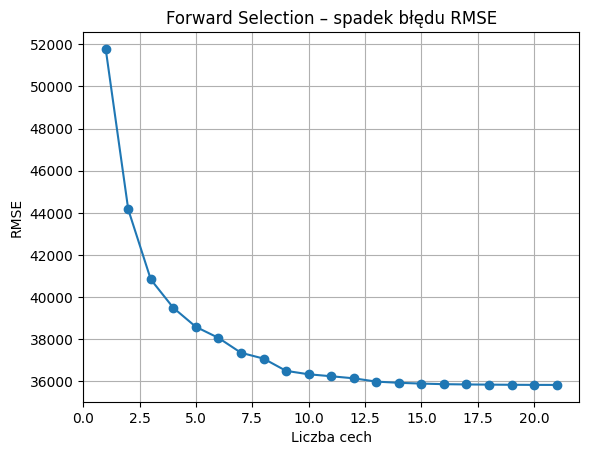

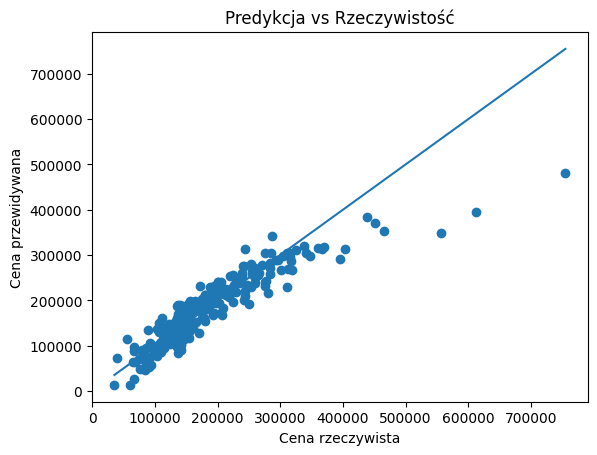

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("AMES_housing_Price.csv")

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df_num = df[num_cols].copy()

print("Kolumny z brakami:")
print(df_num.isnull().sum()[df_num.isnull().sum() > 0])
for col in ["LotFrontage", "MasVnrArea", "GarageYrBlt"]:
    df_num[col].fillna(df_num[col].mean(), inplace=True)

X = df_num.drop("SalePrice", axis=1)
y = df_num["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

remaining_features = list(X.columns)
selected_features = []
best_rmse = np.inf

rmse_history = []

while remaining_features:
    scores = []

    for feature in remaining_features:
        features_to_test = selected_features + [feature]

        model = LinearRegression()
        model.fit(X_train[features_to_test], y_train)
        preds = model.predict(X_test[features_to_test])

        rmse = np.sqrt(mean_squared_error(y_test, preds))
        scores.append((rmse, feature))

    scores.sort()
    current_rmse, best_feature = scores[0]

    if current_rmse < best_rmse:
        best_rmse = current_rmse
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        rmse_history.append(best_rmse)
    else:
        break

print("Wybrane cechy:", selected_features)
print("Najlepsze RMSE:", best_rmse)

final_model = LinearRegression()
final_model.fit(X_train[selected_features], y_train)

final_preds = final_model.predict(X_test[selected_features])
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
print("Final RMSE:", final_rmse)

plt.figure()
plt.plot(range(1, len(rmse_history) + 1), rmse_history, marker='o')
plt.xlabel("Liczba cech")
plt.ylabel("RMSE")
plt.title("Forward Selection – spadek błędu RMSE")
plt.grid(True)
plt.show()

plt.figure()
plt.scatter(y_test, final_preds)
plt.xlabel("Cena rzeczywista")
plt.ylabel("Cena przewidywana")
plt.title("Predykcja vs Rzeczywistość")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()